# Statistics

This notebook contains code for looking at the data's statistics and some trivial facts.

The final report and analysis can be found on: https://github.com/raffyenriquez/Springboard/blob/master/Capstone%20Project/Capstone%20Project%201/Capstone%20Notebook-Visualization.ipynb

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
#load data
df = pd.read_csv('data/kjv.csv')
#rename columns
df = df.rename(columns = {'field': 'Code',
                          'field.1': 'Book',
                          'field.2': 'Chapter',
                          'field.3': 'Verse', 
                          'field.4': 'Words'})

In [3]:
#load titles data
titles = pd.read_csv('data/key_english.csv')
#rename columns
titles = titles.rename(columns = {'field': 'Book', 
                                  'field.1': 'Title',
                                  'field.2': 'OT/NT',
                                  'field.3': 'GenreCode'})

In [4]:
#load genre data
genre = pd.read_csv('data/key_genre_english.csv')
#rename columns
genre = genre.rename(columns = {'field': 'GenreCode', 
                                'field.1': 'Genre'})

In [5]:
#merge titles with genre
merge = titles.merge(genre)
merge.drop(merge.columns[[3]], axis=1, inplace=True)
#merge merge with df
data = df.merge(merge)
#rearrannge columns
data = data[['Code', 'Title', 'OT/NT', 'Genre', 'Book', 'Chapter', 'Verse', 'Words']]

## Transform the data

In [6]:
#separate words and stack in a column
vw = data['Words'].str.split(' ', expand=True).stack()
#remove punctation marks
vw = vw.apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
#to match the index to the verse it came from
vw.index = vw.index.droplevel(1)
#name column
vw.name = "vw"
#join new column to old dataframe
complete = data.join(vw)
#check df_vw
complete.head()

,Code,Title,OT/NT,Genre,Book,Chapter,Verse,Words,vw
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,In
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,the
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,beginning
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,God
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,created


In [7]:
#change all strings to lower case letters
lower = complete['vw'].str.lower()
#name column
lower.name = "vw_lower"
#join new column to original dataframe
complete_lower = data.join(lower)
complete_lower.head()

,Code,Title,OT/NT,Genre,Book,Chapter,Verse,Words,vw_lower
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,in
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,the
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,beginning
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,god
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,created


## Statistics

In [8]:
print ("KJV Bible Stats Summary")
print ("Books: " + str(len(titles)))
print ("Verses " + str(len(data)))
print ("Words: " + str(len(complete)))
print ("Unique Words: " + str(len(complete.vw.unique())))
print ("Unique Words in %: " + str(round((len(complete.vw.unique())/float(len(complete)) * 100), 2)))

KJV Bible Stats Summary
Books: 66
Verses 31103
Words: 789635
Unique Words: 13719
Unique Words in %: 1.74


In [9]:
print ("OT Stats Summary")
print ("Books: " + str(len(titles[titles['OT/NT'] == 'OT'])))
print ("Books in Bible %: " + str(round((len(titles[titles['OT/NT'] == 'OT'])/float(len(titles)) * 100), 2)))
print ("Verses: " + str(len(data[data['OT/NT'] == 'OT'])))
print ("Verses in Bible %: " + str(round((len(data[data['OT/NT'] == 'OT'])/float(len(data)) * 100), 2)))
print ("Words: " + str(len(complete[complete['OT/NT'] == 'OT'])))
print ("Words in Bible %: " + str(round((len(complete[complete['OT/NT'] == 'OT'])/float(len(complete)) * 100), 2)))
print ("Unique Words: " + str(len(complete.loc[complete ['OT/NT'] == 'OT', 'vw'].unique())))
print ("Unique Words in %: " + str(round(len(complete.loc[complete ['OT/NT'] == 'OT', 'vw'].unique())/float(len(complete[complete['OT/NT'] == 'OT'])) * 100, 2)))

OT Stats Summary
Books: 39
Books in Bible %: 59.09
Verses: 23145
Verses in Bible %: 74.41
Words: 609253
Words in Bible %: 77.16
Unique Words: 11527
Unique Words in %: 1.89


In [10]:
print ("NT Stats Summary")
print ("Books: " + str(len(titles[titles['OT/NT'] == 'NT'])))
print ("Books in Bible %: " + str(round((len(titles[titles['OT/NT'] == 'NT'])/float(len(titles)) * 100), 2)))
print ("Verses: " + str(len(data[data['OT/NT'] == 'NT'])))
print ("Verses in Bible %: " + str(round((len(data[data['OT/NT'] == 'NT'])/float(len(data)) * 100), 2)))
print ("Words: " + str(len(complete[complete['OT/NT'] == 'NT'])))
print ("Words in Bible %: " + str(round((len(complete[complete['OT/NT'] == 'NT'])/float(len(complete)) * 100), 2)))
print ("Unique Words: " + str(len(complete.loc[complete ['OT/NT'] == 'NT', 'vw'].unique())))
print ("Unique Words in %: " + str(round(len(complete.loc[complete ['OT/NT'] == 'NT', 'vw'].unique())/float(len(complete[complete['OT/NT'] == 'NT'])) * 100, 2)))

NT Stats Summary
Books: 27
Books in Bible %: 40.91
Verses: 7958
Verses in Bible %: 25.59
Words: 180382
Words in Bible %: 22.84
Unique Words: 6555
Unique Words in %: 3.63


In [11]:
#to get the number of total number of words used per book, percentage of the words to the entire bible, 
#and unique words per book
books = titles.Title

book_s = complete.groupby('Title', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
book_stats = pd.DataFrame()

for x in books:
    words_total = book_s[book_s['Title'] == x].sum()['Counts']
    words_percent = round(book_s[book_s['Title'] == x].sum()['Counts']/float(len(complete)) * 100, 2)
    unique_total = (book_s[book_s['Title'] == x]).count()['vw']
    unique_percent = round((book_s[book_s['Title'] == x]).count()['vw'] / float(words_total) * 100, 2)
    book_stats = book_stats.append(pd.DataFrame([[x, words_total, words_percent,  unique_total, unique_percent]], 
                                                columns =['Title', 'words_total', 'words_percent', 
                                                          'unique_total', 'unique_percent']),
                                   ignore_index=True)

book_stats

,Title,words_total,words_percent,unique_total,unique_percent
0,Genesis,38265,4.85,2648,6.92
1,Exodus,32684,4.14,2179,6.67
2,Leviticus,24543,3.11,1492,6.08
3,Numbers,32895,4.17,2196,6.68
4,Deuteronomy,28352,3.59,2178,7.68
5,Joshua,18852,2.39,1712,9.08
6,Judges,18966,2.40,1794,9.46
7,Ruth,2574,0.33,558,21.68
8,1 Samuel,25047,3.17,2031,8.11
9,2 Samuel,20599,2.61,2009,9.75


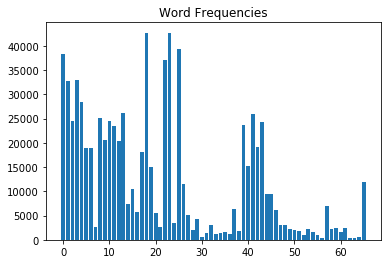

In [12]:
#words frequencies
words_total = book_stats['words_total']
index = np.arange(len(books))
plt.title('Word Frequencies')
plt.bar(index, words_total)
plt.show()

In [13]:
#to get the number of books per genre, percentage in terms of books, total number of words used per genre,
#percentage of the words to the entire bible, unqiue total for the genre and unique percent as compared to word total
genres = genre.Genre

genre_s = complete.groupby('Genre', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
genre_stats = pd.DataFrame()

for x in genres:
    book_total = len(merge[merge['Genre'] == x])
    book_percent = round((len(merge[merge['Genre'] == x])/float(len(titles)) * 100), 2)
    words_total = genre_s[genre_s['Genre'] == x].sum()['Counts']
    words_percent = round(genre_s[genre_s['Genre'] == x].sum()['Counts']/float(len(complete)) * 100, 2)
    unique_total = (genre_s[genre_s['Genre'] == x]).count()['vw']
    unique_percent = round((genre_s[genre_s['Genre'] == x]).count()['vw'] / float(words_total) * 100, 2)
    genre_stats = genre_stats.append(pd.DataFrame([[x, book_total, book_percent, 
                                                    words_total, words_percent, unique_total, unique_percent]], 
                                                    columns =['Genre', 'books', 'book_percent',
                                                              'words_total', 'words_percent', 
                                                              'unique_total', 'unique_percent']),
                                                    ignore_index=True)

genre_stats

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
0,Law,5,7.58,156739,19.85,5064,3.23
1,History,12,18.18,204055,25.84,6896,3.38
2,Wisdom,5,7.58,84058,10.65,4762,5.67
3,Prophets,17,25.76,164401,20.82,5820,3.54
4,Gospels,4,6.06,83883,10.62,3797,4.53
5,Acts,1,1.52,24246,3.07,2436,10.05
6,Epistles,21,31.82,60258,7.63,4139,6.87
7,Apocalyptic,1,1.52,11995,1.52,1382,11.52


In [14]:
book_stats.describe()

,words_total,words_percent,unique_total,unique_percent
count,66.000000,66.000000,66.000000,66.000000
mean,11964.166667,1.515152,1265.106061,20.469848
std,12461.060395,1.578316,841.020372,12.401534
min,295.000000,0.040000,138.000000,6.080000
25%,1992.500000,0.252500,558.000000,9.727500
50%,5847.500000,0.740000,1014.500000,16.385000
75%,20540.500000,2.602500,2005.250000,28.465000
max,42684.000000,5.410000,3301.000000,55.250000


In [15]:
#most used words
complete['vw'].value_counts().to_frame('Counts').reset_index().head(50)

,index,Counts
0,the,62064
1,and,38847
2,of,34427
3,to,13378
4,And,12846
5,that,12577
6,in,12331
7,shall,9760
8,he,9666
9,unto,8940


## Trivial Facts

In [16]:
#longest word 
longest = complete.vw.map(len).max()
for x in complete.vw:
    if len(x) == longest:
        print ('The longest word is ' + str(x) + 'and it has ' + str(longest) + ' letters.')
        break

The longest word is Mahershalalhashbazand it has 18 letters.


In [17]:
#book with the most words
book_stats[book_stats['words_total'] == book_stats.words_total.max()]

,Title,words_total,words_percent,unique_total,unique_percent
18,Psalms,42684,5.41,3174,7.44


In [18]:
#book with the most unique words used
book_stats[book_stats['unique_total'] == book_stats.unique_total.max()]

,Title,words_total,words_percent,unique_total,unique_percent
22,Isaiah,37039,4.69,3301,8.91


In [19]:
#genre with most words used
genre_stats[genre_stats['words_total'] == genre_stats.words_total.max()]

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
1,History,12,18.18,204055,25.84,6896,3.38


In [20]:
#genre with most unique words used
genre_stats[genre_stats['unique_total'] == genre_stats.unique_total.max()]

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
1,History,12,18.18,204055,25.84,6896,3.38
